### Ejercicio final del curso Aprendizaje de maquina Supervisado

Dataset: Wine dataset
Enunciado: Crear un modelo supervisado para pronosticar a que clase pertenece un vino
Se solicita:

1. La implementacion del modelo predictivo (ud. lo selecciona) en Python
2. Una metrica de evaluacion del modelo como por ejemplo validacion cruzada
3. Entregar en notebook cuyo nombre sea nombre_apellido: juan_mondaca
4. Entrega: el Viernes 28 de enero, 2022 antes de las 18 hrs ... en carpeta datosNuevos/testFinal en la biblio
5. Plan B: juan.mondaca@gmail.com
6. Dejare este notebook en la carpeta datosNuevos/testFinal

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
datos_vinos = load_wine()
datos_vinos
print(datos_vinos['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
datos_vinos_DF = pd.DataFrame(datos_vinos.data)
datos_vinos_DF['objetivo'] = datos_vinos.target
datos_vinos_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,objetivo
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Nombre de cada columna numérica

0- Alcohol

1- Malic acid

2- Ash

3- Alcalinity of ash 

4- Magnesium

5- Total phenols

6- Flavanoids

7- Nonflavanoid phenols

8- Proanthocyanins

9- Color intensity

10- Hue

11- OD280/OD315 of diluted wines

12- Proline


### Modelo predictivo a utilizar

Realizaremos un análisis de la base de datos y lo que debe predecir para elegir el mejor modelo a utilizar. Dado que necesitamos hacer una clasificación en 3 clases descartamos abiertamente utilizar regresión lineal para el análisis debido a que son discretas. Además dado que tenemos 3 opciones de clases utilizaremos un modelo multiclase por lo que dejaremos fuera a la regresión logistica. Probaremos con KNN en primera instancia y veremos si resulta conveniente realizar un análisis con otro método.

### KNN:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Renombraremos los titulos del DataFrame para tener una mejor visión de los datos.

In [5]:
datos_vinos_DF.columns=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids",
                       "Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
                       "Proline","objetivo"]

In [6]:
datos_vinos_DF.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,objetivo
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
datos_vinos_DF.shape

(178, 14)

In [8]:
variable_objetivo_clasificacion="objetivo"
variable_independientes_clasificacion=datos_vinos_DF.drop(variable_objetivo_clasificacion,axis=1).columns
variable_independientes_clasificacion

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [9]:
#realizaremos la separación de los datos para su estudio considerando un 30% de test size
X_train,X_test,y_train,y_test = train_test_split(datos_vinos_DF[variable_independientes_clasificacion],datos_vinos_DF[variable_objetivo_clasificacion],test_size=0.3)

In [10]:

modelo_knn_clasificador=KNeighborsClassifier(n_neighbors=5,weights="uniform")
modelo_knn_clasificador.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
predicciones_knn=modelo_knn_clasificador.predict(X_test)
from sklearn.model_selection import cross_val_score


In [12]:
knn_score=cross_val_score(modelo_knn_clasificador,X_test,y_test,cv=10).mean()

In [13]:
knn_score

0.6799999999999999

Ahora que tenemos la puntuación de nuestro modelo KNN verémos si alguno de los otros vistos en modelos tiene mejor puntuación.

### SVM:

In [14]:
from sklearn.svm import SVC
estimador_svm=SVC()
estimador_svm.fit(X_train,y_train)

SVC()

In [15]:
predicciones_SVM=estimador_svm.predict(X_test)
SVM_score=cross_val_score(estimador_svm,X_test,y_test,cv=10).mean()

In [16]:
SVM_score

0.6233333333333333

### Arboles de decisión:

In [17]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier()
arbol.fit(X_train,y_train)
predicciones_tree=arbol.predict(X_test)

In [18]:
tree_score=cross_val_score(arbol,X_test,y_test,cv=10).mean()

In [19]:
tree_score

0.89

### Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
naive_bayes=GaussianNB()

In [22]:
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [23]:
predicciones_NB=naive_bayes.predict(X_test)

In [24]:
predicciones_NB

array([1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2,
       1, 0, 2, 0, 1, 2, 0, 1, 0, 1])

In [25]:
NB_score=cross_val_score(naive_bayes,X_test,y_test,cv=10).mean()

In [26]:
NB_score

0.9833333333333334

In [27]:
scores=[knn_score,SVM_score,tree_score,NB_score]
scoresdf=pd.DataFrame(columns=["knn_score","SVM_score","tree_score","NB_score"])
scoresdf.loc[0]=scores

In [28]:
scoresdf

,knn_score,SVM_score,tree_score,NB_score
0,0.68,0.623333,0.89,0.983333


Observamos como en este caso el que mejor puntuación nos da corresponde a Naive Bayers usando la distribución gaussiana. Luego lo sigue el arbol de decisiones, Knn y SVM en último lugar.

Si deseasemos clasificar el tipo de vino de acuerdo a las características dadas propondriamos inicialmente utilizar Naive Bayes por su alto puntaje viendo como se comporta con datos nuevos. En caso de no predecir adecuadamente podriamos pensar en un sobreentrenamiento por lo que podriamos utilizar el segundo mejor puntuado que corresponde a arboles de decisión.

In [67]:
n_predicciones=list(range(0,54))

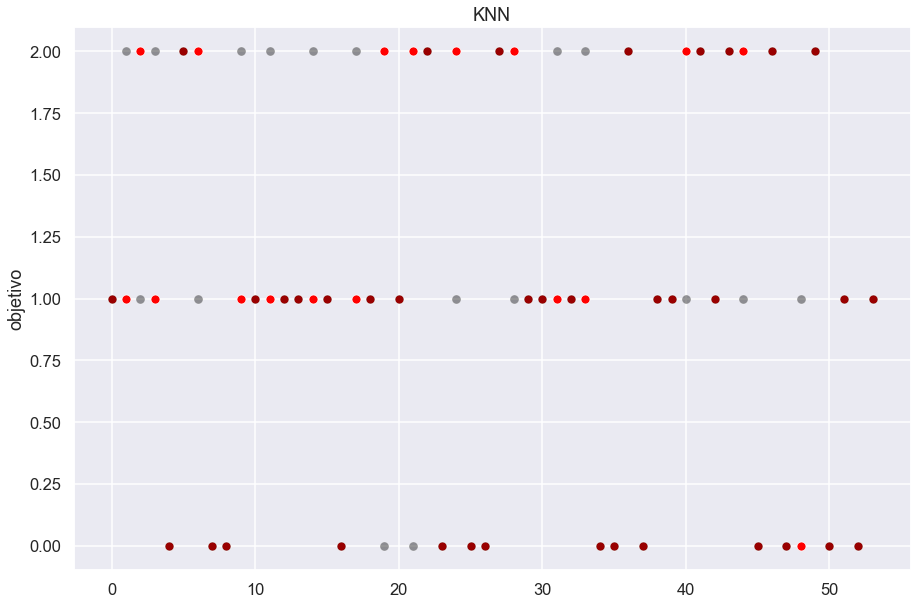

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,10))
sns.scatterplot(x=n_predicciones,y=predicciones_knn,color="red",alpha=1).set_title("KNN")
sns.scatterplot(x=n_predicciones,y=y_test,color="black",alpha=0.4)
sns.set_style("darkgrid")
sns.set_context("talk")

plt.show()

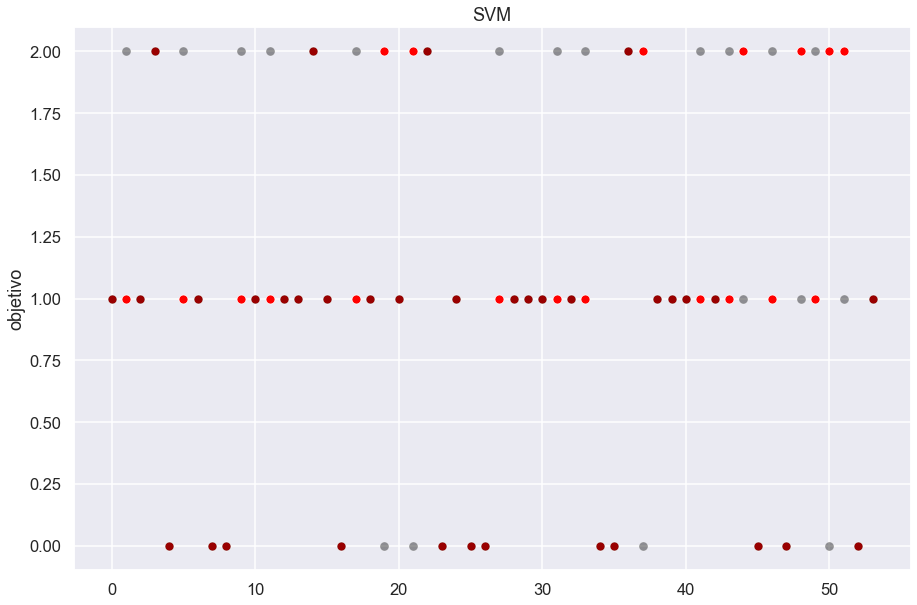

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,10))
sns.scatterplot(x=n_predicciones,y=predicciones_SVM,color="red",alpha=1).set_title("SVM")
sns.scatterplot(x=n_predicciones,y=y_test,color="black",alpha=0.4)
sns.set_style("darkgrid")
sns.set_context("talk")
plt.show()

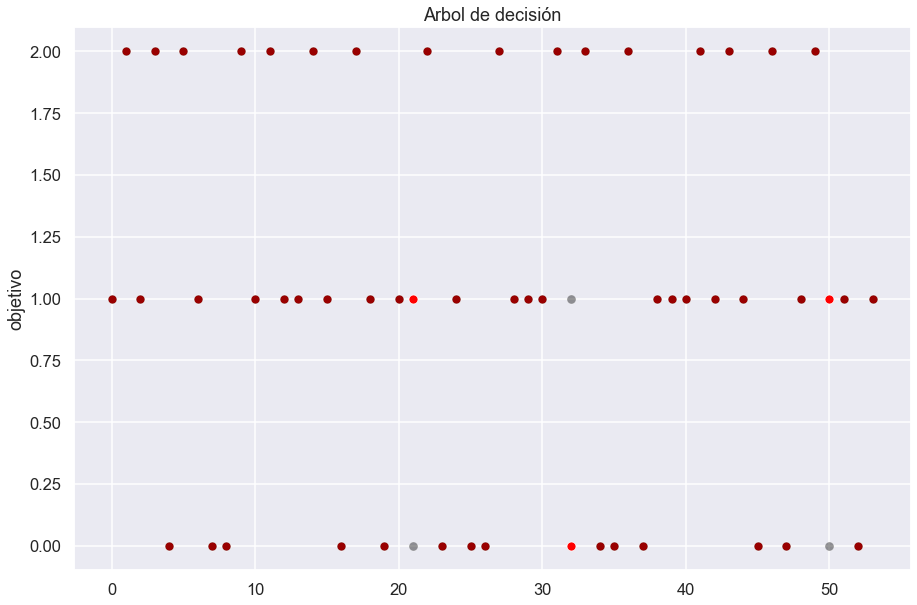

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,10))
sns.scatterplot(x=n_predicciones,y=predicciones_tree,color="red",alpha=1).set_title("Arbol de decisión")
sns.scatterplot(x=n_predicciones,y=y_test,color="black",alpha=0.4)
sns.set_style("darkgrid")
sns.set_context("talk")
plt.show()

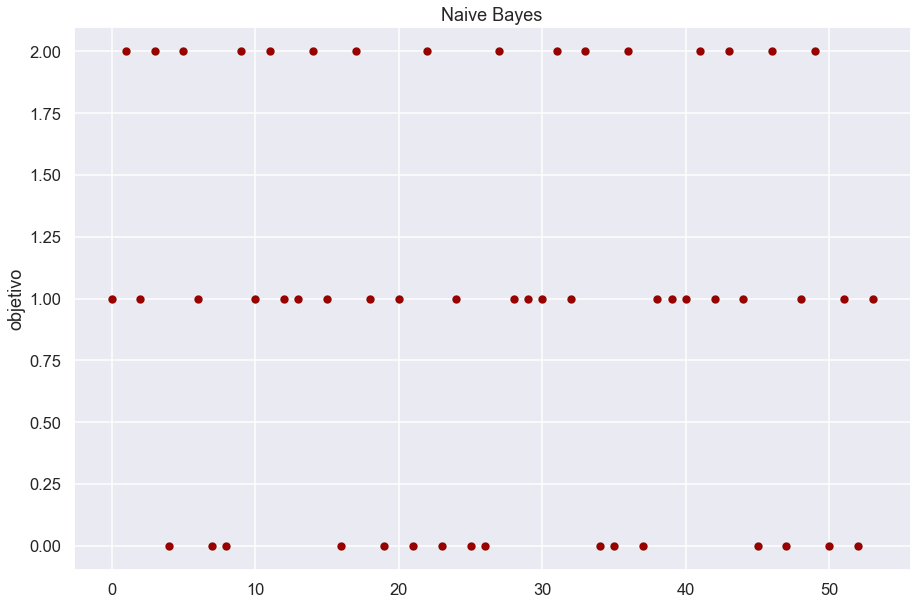

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,10))
sns.scatterplot(x=n_predicciones,y=predicciones_NB,color="red",alpha=1).set_title("Naive Bayes")
sns.scatterplot(x=n_predicciones,y=y_test,color="black",alpha=0.4)
sns.set_style("darkgrid")
sns.set_context("talk")
plt.show()

Finalmente graficamos todos las predicciones y las comparamos con lo datos de test que habiamos escogido. Podemos observar como el color rojo oscuro corresponde a cuando la prediccion acerta, y el rojo y gris cuando los valores de prediccion y el valor real son distintos. Notamos como estos graficos se condicen con los valore del cross value score donde observamos que en el grafico con el metodo SVM tenemos la menor cantidad de puntos aciertos mientras que en el Naive Bayes el máximo.

### Conclusiones

Luego del estudio realizado podemos concluir lo siguiente:

1.- Realizamos el modelamiento predicitivo que fuese capaz de discriminar entre 3 tipos de vino a partir de distintas características del cada uno. Inicialmente realizamos un modelo con el método KNN sin embargo decidimos llevarlo mas allá y realizar una comparación con los otros modelos. De la comparación entre modelos utilizando cross value score obtuvimos lo siguiente:

	knn_score 	SVM_score 	tree_score 	NB_score
    0.68 	     0.623333 	 0.89 	     0.983333

Donde podemos observar que para este caso la mayor puntuacion la obtuvo Naive Bayes y el peor rendimiento SVM.  Restaria revisar los modelos con otros datos para ver si funcionan adecuadamente y evitar un sobreentrenamiento.

2.- Realizamos además graficos de cada predicción versus los valores objetivos reales y reafirmamos los rendimientos calculados observando como parra NB tenemos el mejor rendimiento.